In [1]:
from src.ocsvm.OneClassSVMClassifier import OneClassSVMClassifier
from src.ocsvm.OneClassSVMClassifier import OneClassSVMModel 
import numpy as np
import matplotlib.pyplot as plt
import torch

In [2]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

iris = datasets.load_iris()
feature_names = iris.feature_names
X = iris.data

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [3]:
X_scaled

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [4]:
X_scaled=X_scaled[:,:-2]

In [5]:
feature_names = feature_names[:-2]

In [6]:
feature_names

['sepal length (cm)', 'sepal width (cm)']

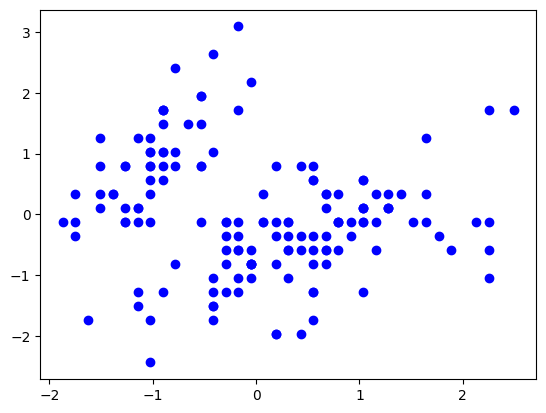

In [7]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], color='b');

In [8]:
ocsvm = OneClassSVMModel(nu=0.1, gamma=0.5)

In [9]:
decision, y_pred = ocsvm.fit(X_scaled)
y_pred

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
       -1.,  1., -1.,  1.,  1.,  1.,  1.,  1.,  1., -1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1., -1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., -1., -1.,  1.,  1.,  1.,
        1.,  1.,  1., -1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
       -1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., -1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1., -1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
       -1., -1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1., -1.,  1.,  1.,  1.,  1., -1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1., -1.])

In [10]:
x_data = torch.tensor(X_scaled)

In [11]:
classifier = OneClassSVMClassifier(x_data, nu=0.1, gamma=0.5, num_inducing_points=100)

In [12]:
classifier.fit()

(array([ 2.15009623e-03,  7.66533325e-03,  7.16453031e-03,  1.27596527e-02,
         9.18482853e-03, -2.34848797e-07,  2.09832483e-02, -2.53399028e-08,
         1.25062240e-02,  2.08456717e-03,  2.54352493e-03,  1.38196071e-03,
         9.89743239e-03,  3.49142719e-08,  1.24979384e-02,  6.39667577e-04,
         8.77357881e-03, -1.52190889e-02,  6.45142624e-03,  2.84823145e-03,
         7.03657074e-03,  9.15595195e-04,  1.86921499e-02,  1.62890107e-03,
         5.55373163e-03,  5.60897073e-04,  1.32578246e-02,  4.12979870e-08,
         7.34669974e-03,  3.52191080e-08,  4.39079176e-04,  7.33307702e-03,
         1.61549531e-02,  1.23045595e-02,  1.67443896e-03, -1.20319332e-07,
         2.74609469e-03, -2.76323002e-07, -6.71498206e-03,  0.00000000e+00,
         2.98509700e-03,  2.39779892e-03,  1.64045541e-03,  2.53075415e-03,
         7.19855136e-04,  6.92227901e-04,  9.04897180e-04,  1.30895843e-02,
         1.36226628e-02,  2.92893051e-03,  2.88958636e-03,  7.95427341e-03,
         2.5

In [13]:
decision, y_pred = classifier.decision()
y_pred

array([ 1.,  1.,  1.,  1.,  1., -1.,  1., -1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1., -1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., -1.,  1., -1., -1.,
        0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1., -1.,  1.,  1.,  1., -1., -1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.])

In [14]:
percentages = {1: np.mean(y_pred == 1) * 100, -1: np.mean(y_pred == -1) * 100}
percentages

{1: 90.0, -1: 9.0}

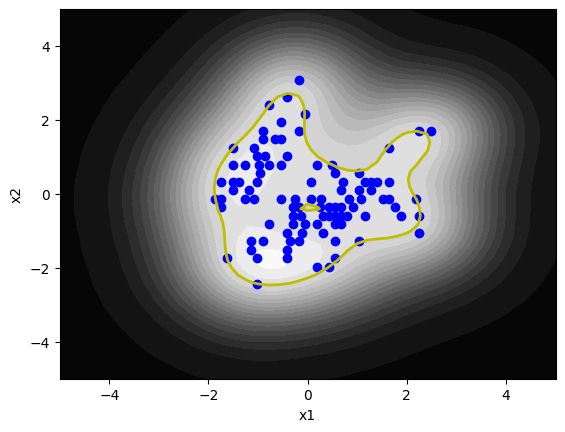

In [15]:
classifier.plot()

In [16]:
from src.explanation_algorithms.OCSVMSHAP import OCSVMSHAP
ocsvm_shap = OCSVMSHAP(X=x_data, classifier=classifier)

In [17]:
ocsvm_shap.fit_ocsvmshap(X=x_data, num_coalitions=2**x_data.shape[1])

/Users/swathisuhas/Documents/CISPA/OCSVM-SHAP/ExplainingGaussianProcess/src/utils/shapley_procedure/coalitions.py:19: RuntimeWarning: divide by zero encountered in log2
  set_to_1 = np.floor(np.log2(rest)).astype(int)
/Users/swathisuhas/Documents/CISPA/OCSVM-SHAP/ExplainingGaussianProcess/src/utils/shapley_procedure/coalitions.py:19: RuntimeWarning: invalid value encountered in cast
  set_to_1 = np.floor(np.log2(rest)).astype(int)
/Users/swathisuhas/Documents/CISPA/OCSVM-SHAP/ExplainingGaussianProcess/src/utils/shapley_procedure/coalitions.py:19: RuntimeWarning: invalid value encountered in log2
  set_to_1 = np.floor(np.log2(rest)).astype(int)
  0%|          | 0/3 [00:00<?, ?it/s]

100%|██████████| 3/3 [00:00<00:00, 271.07it/s]


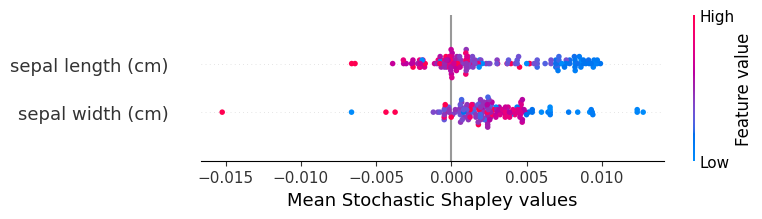

In [18]:
from src.utils.visualisation.deterministic_values import summary_plot
mean_stochastic_shapley_values = ocsvm_shap.return_deterministic_shapley_values()
summary_plot(mean_stochastic_shapley_values, x_data, feature_names=feature_names)
plt.xlabel("Mean Stochastic Shapley values")
plt.show()